# CME / Pencil Code

In [1]:
from CME_pipline import Config, discover_sims, _filter_sims, run_pipeline
from CME_pipline import *
import pencil as pc

$ conda install -c plotly plotly-orca psutil requests


In [2]:
cfg = Config()

cfg.make_anim_hel = True
cfg.make_anim_mag = True
cfg.make_anim_hel_frac= True

In [3]:
sims = discover_sims(cfg.ROOT)
[s.name for s in sims]   # type: ignore
#target = "256_gamma3_new_source7_lambda1e12_k500"
target = "1024_gamma3_new_source7_k200b"
sim = [s for s in sims if s.name == target][0] # type: ignore

? WARNING: Couldnt load grid for /home/mgurgeni/programming/murman/CME/3D/1024_gamma3_new_source7
? WARNING: Couldnt load grid for /home/mgurgeni/programming/murman/CME/3D/1024_gamma3_new_source7_k200b
? WARNING: Couldnt load grid for /home/mgurgeni/programming/murman/CME/3D/1024_gamma3_new_source7_k500
? WARNING: Couldnt load grid for /home/mgurgeni/programming/murman/CME/3D/128_gamma3_new_source7_k3000
? WARNING: Couldnt load grid for /home/mgurgeni/programming/murman/CME/3D/128_gamma3_new_source7_lambda2e8_k1000
? WARNING: Couldnt load grid for /home/mgurgeni/programming/murman/CME/3D/256_gamma3_new_source7_lambda16e8_k500
? WARNING: Couldnt load grid for /home/mgurgeni/programming/murman/CME/3D/256_gamma3_new_source7_lambda16e9_k500
? WARNING: Couldnt load grid for /home/mgurgeni/programming/murman/CME/3D/256_gamma3_new_source7_lambda1e12_k500
? WARNING: Couldnt load grid for /home/mgurgeni/programming/murman/CME/3D/256_gamma3_new_source7_lambda2e8_k500
? WARNING: Couldnt load grid

Detected runs: ['1024_gamma3_new_source7_k200b']
appending hel_kin
appending hel_mag
appending sp
appending krms
appending mag
appending kin
powerhel_kin.dat


/home/mgurgeni/pencil-code/python/pencil/read/powers.py:388: UserWarning:

grid.dat not found. Assuming the box is cubical.



powerhel_mag.dat
power_sp.dat
power_krms.dat
power_mag.dat
power_kin.dat
Invalid data on line 616. Skipping.
Invalid data on line 617. Skipping.
Invalid data on line 618. Skipping.
Invalid data on line 619. Skipping.
Invalid data on line 620. Skipping.
Invalid data on line 621. Skipping.
Invalid data on line 622. Skipping.
Invalid data on line 623. Skipping.
Invalid data on line 624. Skipping.
Invalid data on line 625. Skipping.
Invalid data on line 626. Skipping.
Invalid data on line 627. Skipping.
Invalid data on line 628. Skipping.
Invalid data on line 629. Skipping.
Invalid data on line 630. Skipping.
Invalid data on line 631. Skipping.
Invalid data on line 632. Skipping.
Invalid data on line 633. Skipping.
Invalid data on line 634. Skipping.
Invalid data on line 635. Skipping.
Invalid data on line 636. Skipping.
Invalid data on line 637. Skipping.
Invalid data on line 638. Skipping.
Invalid data on line 639. Skipping.
Invalid data on line 640. Skipping.
Invalid data on line 641. S

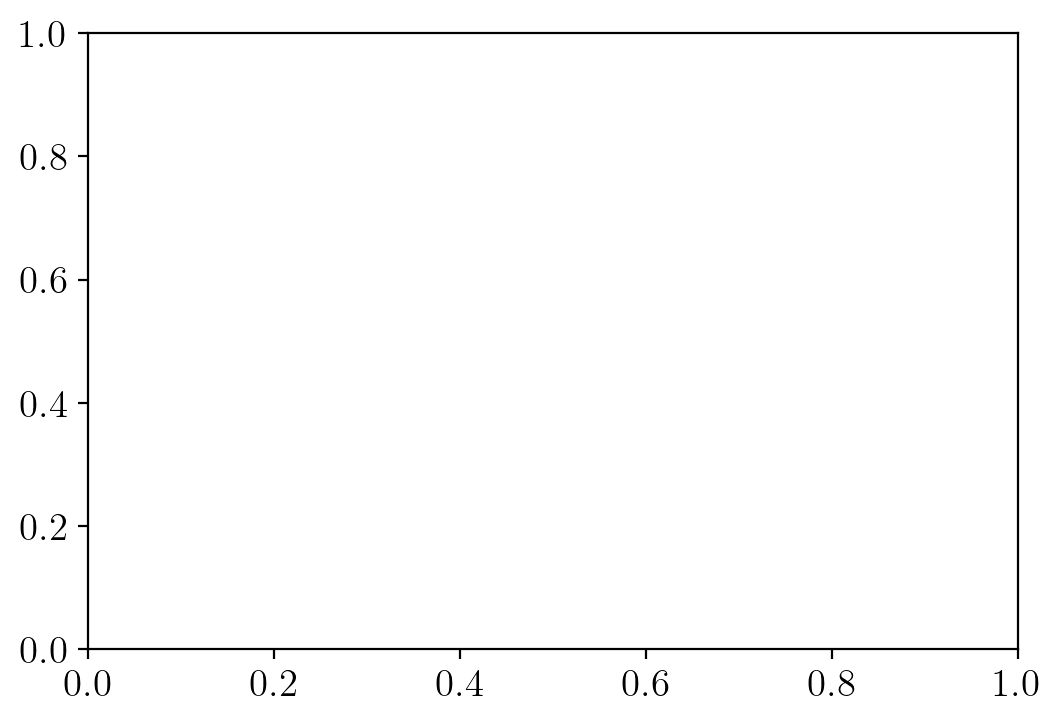

In [4]:
run_pipeline(cfg, sims_override=[sim]) # [sim] if you wnat to see something specific 

Read 5000 lines.
Read 6914 lines.
Read 6929 lines.
Read 33 lines.
Read 50 lines.
Read 50 lines.


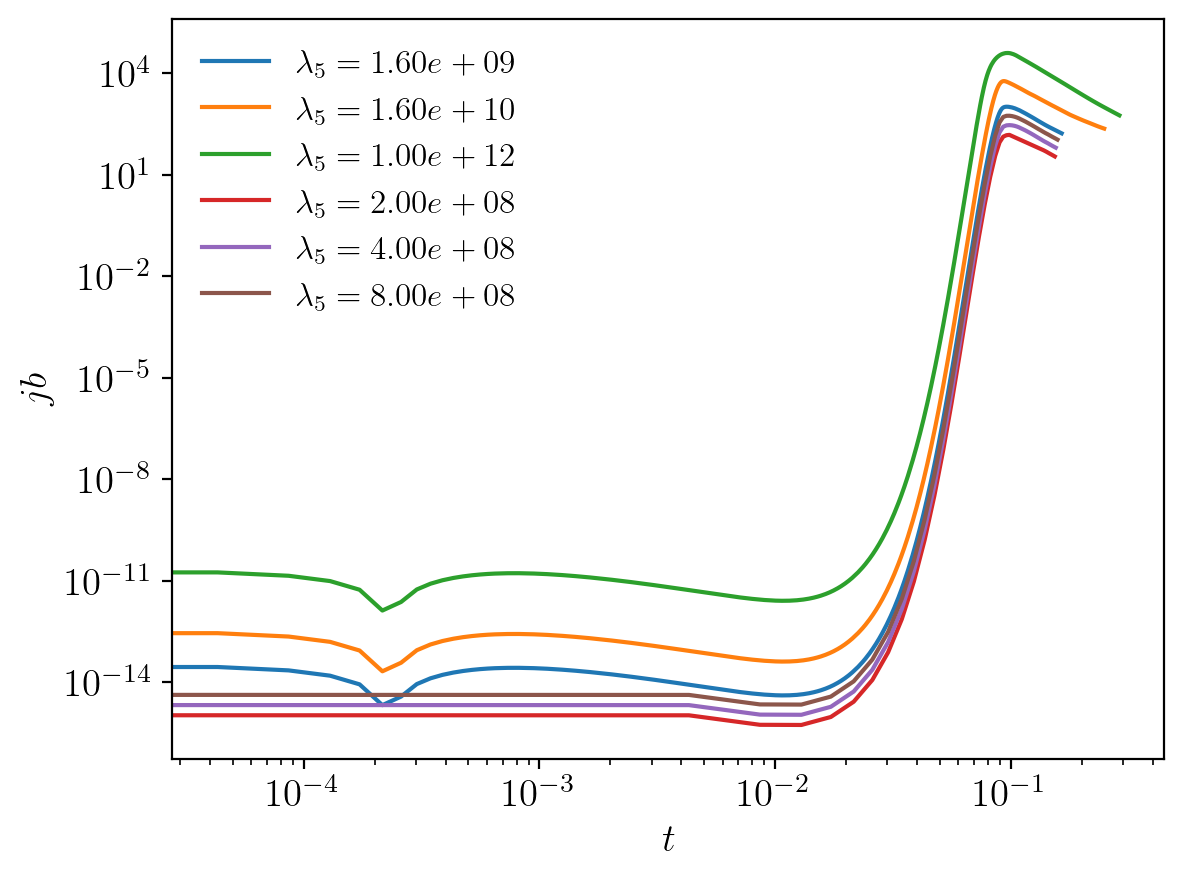

In [8]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

# Distinct, scientific, color-blind-safe palette (Tol 2012)
tol_colors = [
    "#332288", "#117733", "#44AA99", "#88CCEE",
    "#DDCC77", "#CC6677", "#AA4499", "#882255"
]

linestyles = ["-", "--", "-.", ":"]
style_cycle = itertools.cycle(
    [(c, ls) for c in tol_colors for ls in linestyles]
)

for sim in sims:
    if sim.name.startswith("256"):
        ts = pc.read.ts(datadir=sim.datadir)
        pars = pc.read.param(datadir=sim.datadir, param2=True)
        lam = getattr(pars, "lambda5", None)
        t = np.asarray(ts.t) - cfg.t_offset
        JBm = ts.jbm 
        mu5 = np.asarray(ts.mu5m)
        lam = getattr(pars,"lambda5")
        eta = getattr(pars,"eta")
        gamma = getattr(pars,"gammaf5")

        if lam is not None:
            label = rf"$\lambda_5 = {lam:.2e}$"
        else:
            label = sim.name

        color, ls = next(style_cycle)
        plt.loglog(t, np.abs(lam * eta * (-JBm))/gamma, label = label)
        

plt.xlabel(r"$t$")
plt.ylabel(r"$jb$")
plt.legend(frameon=False)
plt.show()
